In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clinical_train = pd.read_csv('/Users/fuhancong/Desktop/Cornell/Spring 2023/ORIE5741/Project/amp-parkinsons-disease-progression-prediction (1)/train_clinical_data.csv')

protein_train = pd.read_csv('/Users/fuhancong/Desktop/Cornell/Spring 2023/ORIE5741/Project/amp-parkinsons-disease-progression-prediction (1)/train_proteins.csv')
protein_test_train = pd.read_csv('/Users/fuhancong/Desktop/Cornell/Spring 2023/ORIE5741/Project/amp-parkinsons-disease-progression-prediction (1)/test_proteins.csv')

peptides_train = pd.read_csv('/Users/fuhancong/Desktop/Cornell/Spring 2023/ORIE5741/Project/amp-parkinsons-disease-progression-prediction (1)/train_peptides.csv')
peptides_test = pd.read_csv('/Users/fuhancong/Desktop/Cornell/Spring 2023/ORIE5741/Project/amp-parkinsons-disease-progression-prediction (1)/test_peptides.csv')




In [3]:
# A function that presents all initial EDA of dataset
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))




In [4]:
initial_eda(protein_train)


Dimensions : 232741 rows, 5 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object         1113          0
                           visit_month      int64           15          0
                            patient_id      int64          248          0
                               UniProt     object          227          0
                                   NPX    float64       218795          0


In [5]:
initial_eda(peptides_train)


# In[ ]:





# # Clinical_train (Disease severity)
# updrs_test - The patient's score for part N of the Unified Parkinson's Disease Rating Scale
# 
# UPDRS_1: non-motor experiences of daily living. Range 0-52. 10 and below is mild, 22 and above is severe
# 
# UPDRS_2: motor experiences of daily living. Range: 0–52. 12 and below is mild, 30 and above is severe
# 
# UPDRS_3: motor examination. Range: 0–132. 32 and below is mild, 59 and above is severe
# 
# UPDRS_4: motor complications related to motor function. Range: 0–24, 4 and below is mild, 13 and above is severe
# 
# upd23b_clinical_state_on_medication - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment.



Dimensions : 981834 rows, 6 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object         1113          0
                           visit_month      int64           15          0
                            patient_id      int64          248          0
                               UniProt     object          227          0
                               Peptide     object          968          0
                      PeptideAbundance    float64       738931          0


In [6]:
initial_eda(clinical_train) # collected by visit times


Dimensions : 2615 rows, 8 columns
Total NA Values : 2393 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object         2615          0
                            patient_id      int64          248          0
                           visit_month      int64           17          0
                               updrs_1    float64           32          1
                               updrs_2    float64           36          2
                               updrs_3    float64           72         25
                               updrs_4    float64           19       1038
   upd23b_clinical_state_on_medication     object            2       1327


In [7]:
for i in ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']:
    # x.mode().mean() - stable?
    mode = clinical_train.groupby('patient_id')[i].apply(lambda x : x.mode().mean())
    for j in mode.index:
        clinical_train.loc[clinical_train['patient_id'] == j, i] = clinical_train.loc[clinical_train['patient_id'] == j, i].fillna(mode[j])
initial_eda(clinical_train)
clinical_train


Dimensions : 2615 rows, 8 columns
Total NA Values : 1848 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object         2615          0
                            patient_id      int64          248          0
                           visit_month      int64           17          0
                               updrs_1    float64           33          0
                               updrs_2    float64           36          0
                               updrs_3    float64           81          0
                               updrs_4    float64           24        521
   upd23b_clinical_state_on_medication     object            2       1327


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,0.0,NaN
1,55_3,55,3,10.0,7.0,25.0,0.0,NaN
2,55_6,55,6,8.0,10.0,34.0,0.0,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [8]:
initial_eda(clinical_train)

Dimensions : 2615 rows, 8 columns
Total NA Values : 1848 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object         2615          0
                            patient_id      int64          248          0
                           visit_month      int64           17          0
                               updrs_1    float64           33          0
                               updrs_2    float64           36          0
                               updrs_3    float64           81          0
                               updrs_4    float64           24        521
   upd23b_clinical_state_on_medication     object            2       1327


In [9]:
clinical_train.loc[clinical_train['updrs_1'].between(0, 10, 'both'), 'updrs_1_rating'] = 'Mild'
clinical_train.loc[clinical_train['updrs_1'].between(10, 21, 'right'), 'updrs_1_rating'] = 'Moderate'
clinical_train.loc[clinical_train['updrs_1'].between(21, 52, 'right'), 'updrs_1_rating'] = 'Severe'

clinical_train.loc[clinical_train['updrs_2'].between(0, 12, 'both'), 'updrs_2_rating'] = 'Mild'
clinical_train.loc[clinical_train['updrs_2'].between(12,29, 'right'), 'updrs_2_rating'] = 'Moderate'
clinical_train.loc[clinical_train['updrs_2'].between(29, 52, 'right'), 'updrs_2_rating'] = 'Severe'

clinical_train.loc[clinical_train['updrs_3'].between(0, 32, 'both'), 'updrs_3_rating'] = 'Mild'
clinical_train.loc[clinical_train['updrs_3'].between(32,58, 'right'), 'updrs_3_rating'] = 'Moderate'
clinical_train.loc[clinical_train['updrs_3'].between(58, 132, 'right'), 'updrs_3_rating'] = 'Severe'

clinical_train.loc[clinical_train['updrs_4'].between(0, 4, 'both'), 'updrs_4_rating'] = 'Mild'
clinical_train.loc[clinical_train['updrs_4'].between(4,12, 'right'), 'updrs_4_rating'] = 'Moderate'
clinical_train.loc[clinical_train['updrs_4'].between(12, 24, 'right'), 'updrs_4_rating'] = 'Severe'




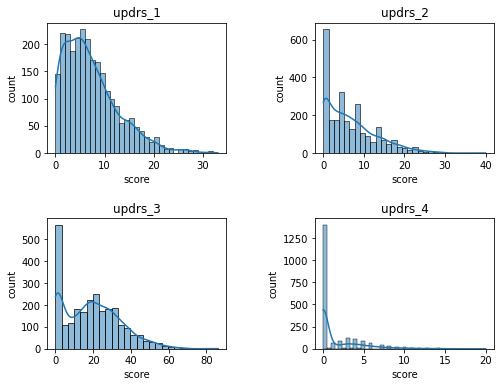

In [10]:
f, axs = plt.subplots(2, 2, figsize = (8, 6))
for i, ax in zip(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'], axs.ravel()):
    data = pd.DataFrame(clinical_train[i].value_counts()).reset_index()
    sns.histplot(data = clinical_train[i], kde = True, ax = ax)
    ax.set_title(i)
    ax.set_xlabel('score')
    ax.set_ylabel('count')
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.rcParams["xtick.labelsize"] = 9
plt.show()
# right skewed: maybe more serious, fewer people(die)




In [11]:
clinical_train.columns


Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication',
       'updrs_1_rating', 'updrs_2_rating', 'updrs_3_rating', 'updrs_4_rating'],
      dtype='object')

In [12]:
# transfer clinical_train from wide table to long table
clinical_train_long = pd.melt(clinical_train[['visit_id', 'patient_id', 'visit_month','updrs_1_rating', 'updrs_2_rating', 'updrs_3_rating', 'updrs_4_rating']]
                              , id_vars=['visit_id', 'patient_id', 'visit_month']
                              , var_name='updrs_type', value_name='updrs_rating')
clinical_train_long = clinical_train_long.groupby(['updrs_type', 'updrs_rating']).count().reset_index()
clinical_train_long




,updrs_type,updrs_rating,visit_id,patient_id,visit_month
0,updrs_1_rating,Mild,2019,2019,2019
1,updrs_1_rating,Moderate,548,548,548
2,updrs_1_rating,Severe,48,48,48
3,updrs_2_rating,Mild,2136,2136,2136
4,updrs_2_rating,Moderate,473,473,473
5,updrs_2_rating,Severe,6,6,6
6,updrs_3_rating,Mild,2108,2108,2108
7,updrs_3_rating,Moderate,481,481,481
8,updrs_3_rating,Severe,26,26,26
9,updrs_4_rating,Mild,1799,1799,1799


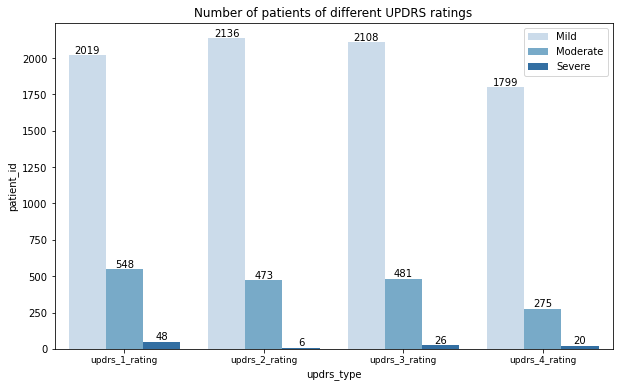

In [13]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = clinical_train_long, x = 'updrs_type', y = 'patient_id', hue = 'updrs_rating', palette = "Blues")
plt.title('Number of patients of different UPDRS ratings')
plt.legend(loc = 'upper right')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()
# also right skewed



In [15]:
month_uprs = clinical_train.groupby('visit_month').mean().reset_index()
month_uprs.head()
month_uprs.columns

Index(['visit_month', 'patient_id', 'updrs_1', 'updrs_2', 'updrs_3',
       'updrs_4'],
      dtype='object')

In [16]:
month_uprs.columns

Index(['visit_month', 'patient_id', 'updrs_1', 'updrs_2', 'updrs_3',
       'updrs_4'],
      dtype='object')

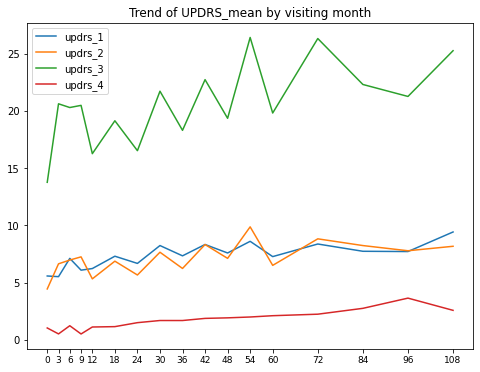

In [17]:
plt.figure(figsize = (8, 6))
for i in ['updrs_1', 'updrs_2','updrs_3', 'updrs_4']:
    plt.plot('visit_month', i, data = month_uprs)
plt.title('Trend of UPDRS_mean by visiting month')
plt.legend(loc = 'upper left')
plt.xticks(list(month_uprs['visit_month']), list(month_uprs['visit_month'])) # months are not evenly distributed
plt.show()
# The scores are not a linear relationship with months.
